## Case Study Title:
### Understanding Employee Sentiment with NLP: A Data-Driven Approach to Workplace Engagement


In [2]:
! pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 146.3 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 146.3 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 146.3 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 146.3 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 146.3 kB/s eta 0:00:02
   ----- ---------------------------------- 41.0/301.2 kB 85.6 kB/s eta 0:00:04
   ----- ---------------------------------- 41.0/301.2 kB 85.6 kB/s eta 0:00:04
   ----- ---------------------------------- 41.0/301.2 kB 85.6 kB/s eta 0:00:04
  

In [ ]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from wordcloud import WordCloud # For visualizing text/words, common words

In [7]:
dt =  pd.read_csv(r'C:\Users\pascal\Desktop\PROJECTS 2025\ML-Employee Feedback Sentiment Analysis\ML-Employee-Feedback-Sentiment-Analysis\Data\Dataset.csv')
dt.head()

,ID,Comment_Positives,Comment_Negatives,Advice_To_Mgmt,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Employee_Engagement_Activities,Employee_Tenure,Location,Feedback_Date,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
0,1,People are smart and friendly,Bureaucracy is slowing things down,NaN,5,5,5,5,3,5,No,7,CityA,2023-01-16 23:32:22.717722,5,1,4
1,2,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,5,5,5,5,3,5,No,2,CityA,2023-04-03 23:32:22.717722,1,2,4
2,3,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,5,5,3,5,Yes,5,CityC,2023-06-25 23:32:22.717722,3,5,4
3,4,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,4,4,5,5,2,4,Yes,5,CityB,2023-08-04 23:32:22.717722,3,4,3
4,10,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,4,4,5,5,2,4,No,8,CityB,2023-03-31 23:32:22.717722,5,2,3


In [15]:
dt.describe()

,ID,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Employee_Tenure,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
count,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000
mean,33998.602716,3.588179,3.588179,4.391218,4.391218,1.746242,3.588179,5.493671,3.192181,3.251187,2.609012
std,19506.284643,0.996981,0.996981,0.771997,0.771997,0.763744,0.996981,2.885124,1.722801,1.423715,0.952117
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17198.750000,3.000000,3.000000,4.000000,4.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000
50%,34121.500000,4.000000,4.000000,5.000000,5.000000,2.000000,4.000000,5.000000,3.000000,4.000000,3.000000
75%,50907.500000,4.000000,4.000000,5.000000,5.000000,2.000000,4.000000,8.000000,5.000000,5.000000,3.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,10.000000,5.000000,5.000000,4.000000


Descriptons from Employee Feedback Data
1. Overall Employee Satisfaction

Employees rate the company 3.59/5 overall, suggesting moderate satisfaction. There's room for improvement, especially in targeted areas.

2. Strengths

Company Culture and Career Opportunities are both highly rated at 4.39/5, indicating that employees generally appreciate the organizational values and growth potential.

Employee Tenure averages 5.49 years, showing that many employees stay long-term — a positive sign of loyalty and stability.

3. Areas of Concern

Compensation and Benefits are poorly rated at just 1.75/5, which may contribute to dissatisfaction or potential turnover.

Remote Work Satisfaction is also low at 2.61/5, suggesting flexibility and remote policies need reevaluation.

Career Growth Opportunities sits at 3.19/5, lower than general career opportunity ratings, indicating a possible disconnect between potential and real advancement.

4. Mixed Signals

Work-Life Balance and Senior Management are rated at 3.59/5, showing an average experience. While not poor, they’re not outstanding either and could benefit from targeted initiatives.

### Data Preprocessing 

In [22]:
duplicates = dt['ID'].duplicated().sum()
print("Number of duplicate IDs:", duplicates)




Number of duplicate IDs: 0


In [25]:
null_check = dt.isnull().any()
print(null_check)

ID                                   False
Comment_Positives                    False
Comment_Negatives                    False
Advice_To_Mgmt                        True
Overall_Ratings                      False
Work_Balance_Stars                   False
Culture_Values_Stars                 False
Career_Opportunities_Stars           False
Comp_Benefit_Stars                   False
Senior_Management_Stars              False
Employee_Engagement_Activities       False
Employee_Tenure                      False
Location                             False
Feedback_Date                        False
Career_Growth_Opportunities_Stars    False
Wellness_Programs_Satisfaction       False
Remote_Work_Satisfaction             False
dtype: bool


 `Advice_To_Mgmt` column in the dataset has missing values. We will now go ahead to check for how much of it is missing in this column.

In [26]:
dt['Advice_To_Mgmt'].isnull().value_counts()

False    16893
True     13443
Name: Advice_To_Mgmt, dtype: int64

False: 16,893 → These rows have a value for "Advice to Management".

True: 13,443 → These rows do not have any advice to management (i.e., nulls).

So:

About 44% of entries are missing in the "Advice to Management" column.



In [27]:
dt['Advice_To_Mgmt'].fillna("No advice given", inplace=True)


We noticed that the Advice_To_Mgmt column had missing values. Since this is a text field and likely optional, we assumed that employees who left it blank had no specific advice to share. 
To avoid introducing unintended sentiment, we filled these missing entries with a neutral placeholder — "No advice given".

In [28]:
dt.isnull().any()

ID                                   False
Comment_Positives                    False
Comment_Negatives                    False
Advice_To_Mgmt                       False
Overall_Ratings                      False
Work_Balance_Stars                   False
Culture_Values_Stars                 False
Career_Opportunities_Stars           False
Comp_Benefit_Stars                   False
Senior_Management_Stars              False
Employee_Engagement_Activities       False
Employee_Tenure                      False
Location                             False
Feedback_Date                        False
Career_Growth_Opportunities_Stars    False
Wellness_Programs_Satisfaction       False
Remote_Work_Satisfaction             False
dtype: bool

## 🔍 Data Analysis and Visualization

In this section, we’ll explore the dataset to uncover patterns and insights through:

- Distribution of key variables
- Relationships between features
- Word patterns in employee feedback
- Time-based trends

### 1. Univariate Analysis

We start by examining variables individually to understand their distribution and behavior.

#### a. Numerical Variables

We'll analyze the distribution of the following numerical features:

- `Overall_Ratings`
- `Work_Balance_Stars`
- `Culture_Values_Stars`
- `Career_Opportunities_Stars`
- `Comp_Benefit_Stars`
- `Senior_Management_Stars`
- `Employee_Tenure`
- `Career_Growth_Opportunities_Stars`
- `Wellness_Programs_Satisfaction`
- `Remote_Work_Satisfaction`


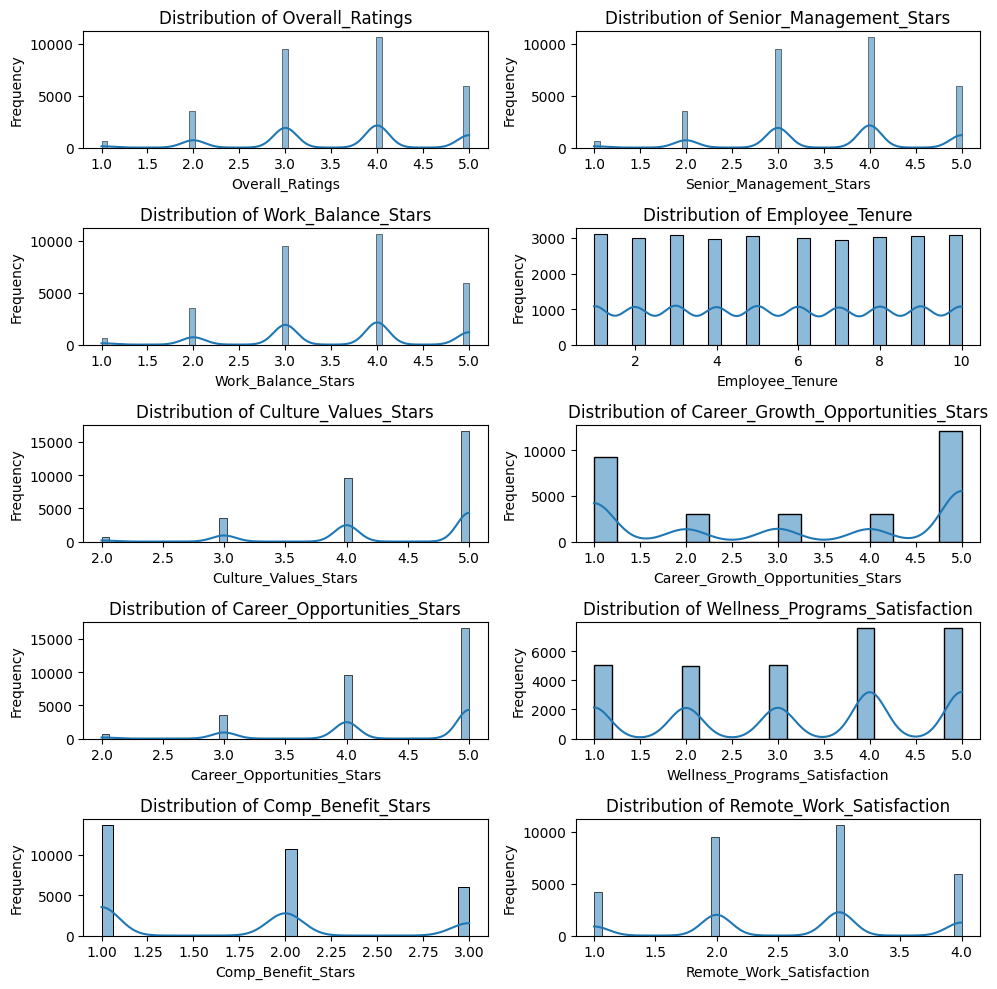

In [33]:
# Numerical Columns
numerical_columns = [
    'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars',
    'Career_Opportunities_Stars', 'Comp_Benefit_Stars', 'Senior_Management_Stars',
    'Employee_Tenure', 'Career_Growth_Opportunities_Stars',
    'Wellness_Programs_Satisfaction', 'Remote_Work_Satisfaction'
]


fig, axes = plt.subplots (5,2, figsize = (10,10))

# Loop through the first five columns and make the plot
for i, col in enumerate(numerical_columns[:5]):
    sns.histplot(dt[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

# Loop through the last five columns and make the plot
for i, col in enumerate(numerical_columns[5:]):
    sns.histplot(dt[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Univariate Analysis – Numerical Features (Summary of Distributions)

Overall Ratings: Most employees rate the company 3 or 4 out of 5 — indicating general satisfaction but with room to improve.

Work-Life Balance & Senior Management: These ratings cluster between 3 and 4, showing average perceptions; neither poor nor excellent.

Employee Tenure: Fairly even spread across 1–10 years, suggesting a balanced mix of new and long-serving employees.

Culture & Career Opportunities: Ratings steadily increase toward 5, reflecting positive views about the company's environment and advancement prospects.

Career Growth Opportunities: Polarized — many rate it either very low or very high, implying inconsistent experiences across teams or roles.

Wellness Programs: Slightly higher ratings overall, with more responses around 4 and 5 — suggesting a generally favorable view of wellness support.

Compensation & Benefits: Majority of ratings are low (1–2), highlighting dissatisfaction in this area.

Remote Work Satisfaction: Ratings are clustered around 2 and 3, showing mixed experiences with flexible work options.

### b. Univariate Analysis: Categorical Variables

In this section, we examine how the categorical variables are distributed to understand patterns in employee engagement and demographics. The categorical columns include:

- `Employee_Engagement_Activities`: Indicates whether the employee participated in engagement activities (Yes/No).
- `Location`: The location or region of the employee within the organization.


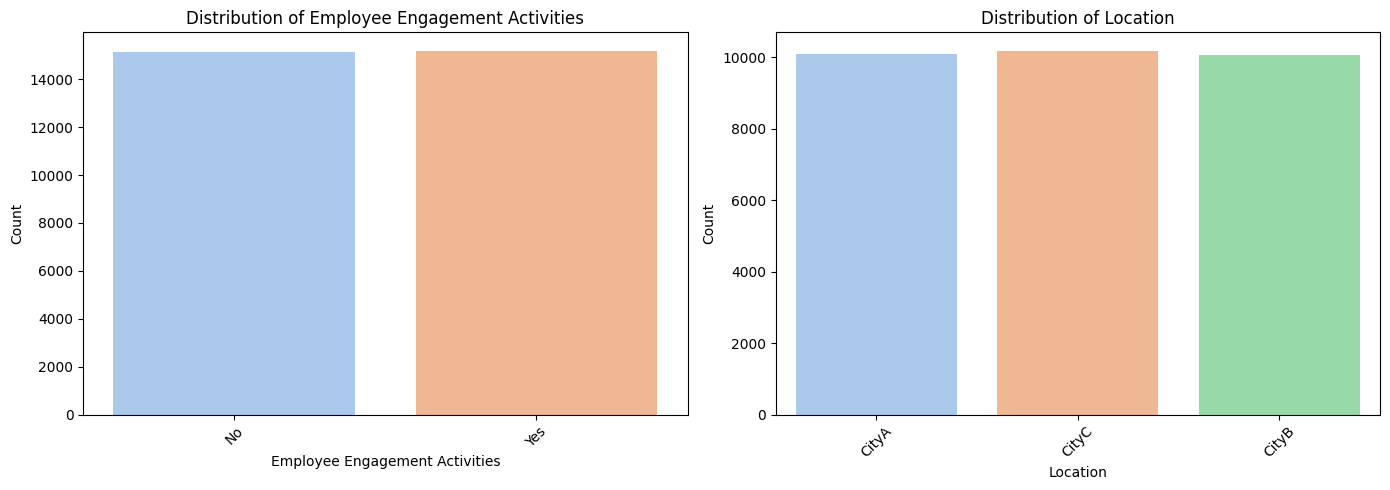

In [39]:
# Define categorical columns
categorical_columns = ['Employee_Engagement_Activities', 'Location']

# Create 1 row, 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loop through each column and create a countplot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=dt, x=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {col.replace("_", " ")}')
    axes[i].set_xlabel(col.replace("_", " "))
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



From the charts above:

- **Employee Engagement Activities**: Participation is evenly split — roughly half of employees engage in activities while the other half do not. This suggests potential to explore what’s working and what could be improved in engagement efforts.

- **Location**: Feedback is fairly balanced across the three cities (CityA, CityB, and CityC), ensuring that the data isn’t biased toward a single location. This supports the validity of general insights drawn from the dataset.


### 2. Bivariate Analysis

In this section, we explore how pairs of features relate to each other. This helps uncover patterns, trends, or correlations that might exist. We'll look at:

- Numerical vs Numerical
- Categorical vs Categorical
- Categorical vs Numerical

#### a. Bivariate Analysis: Numerical vs Numerical

We'll start by checking relationships between numerical features — especially the rating columns — to see if any of them are correlated.


In [44]:
# Select rating-related columns
rating_columns = [
    'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars',
    'Career_Opportunities_Stars', 'Comp_Benefit_Stars', 'Senior_Management_Stars',
    'Career_Growth_Opportunities_Stars', 'Wellness_Programs_Satisfaction',
    'Remote_Work_Satisfaction'
]

# Compute correlation matrix
corr_matrix = dt[rating_columns].corr()
corr_matrix


,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
Overall_Ratings,1.000000,1.000000,0.930129,0.930129,0.920971,1.000000,0.000248,-0.006199,0.990315
Work_Balance_Stars,1.000000,1.000000,0.930129,0.930129,0.920971,1.000000,0.000248,-0.006199,0.990315
Culture_Values_Stars,0.930129,0.930129,1.000000,1.000000,0.770535,0.930129,0.000823,-0.006271,0.906179
Career_Opportunities_Stars,0.930129,0.930129,1.000000,1.000000,0.770535,0.930129,0.000823,-0.006271,0.906179
Comp_Benefit_Stars,0.920971,0.920971,0.770535,0.770535,1.000000,0.920971,-0.000015,-0.009440,0.942987
Senior_Management_Stars,1.000000,1.000000,0.930129,0.930129,0.920971,1.000000,0.000248,-0.006199,0.990315
Career_Growth_Opportunities_Stars,0.000248,0.000248,0.000823,0.000823,-0.000015,0.000248,1.000000,-0.004535,0.000331
Wellness_Programs_Satisfaction,-0.006199,-0.006199,-0.006271,-0.006271,-0.009440,-0.006199,-0.004535,1.000000,-0.006582
Remote_Work_Satisfaction,0.990315,0.990315,0.906179,0.906179,0.942987,0.990315,0.000331,-0.006582,1.000000


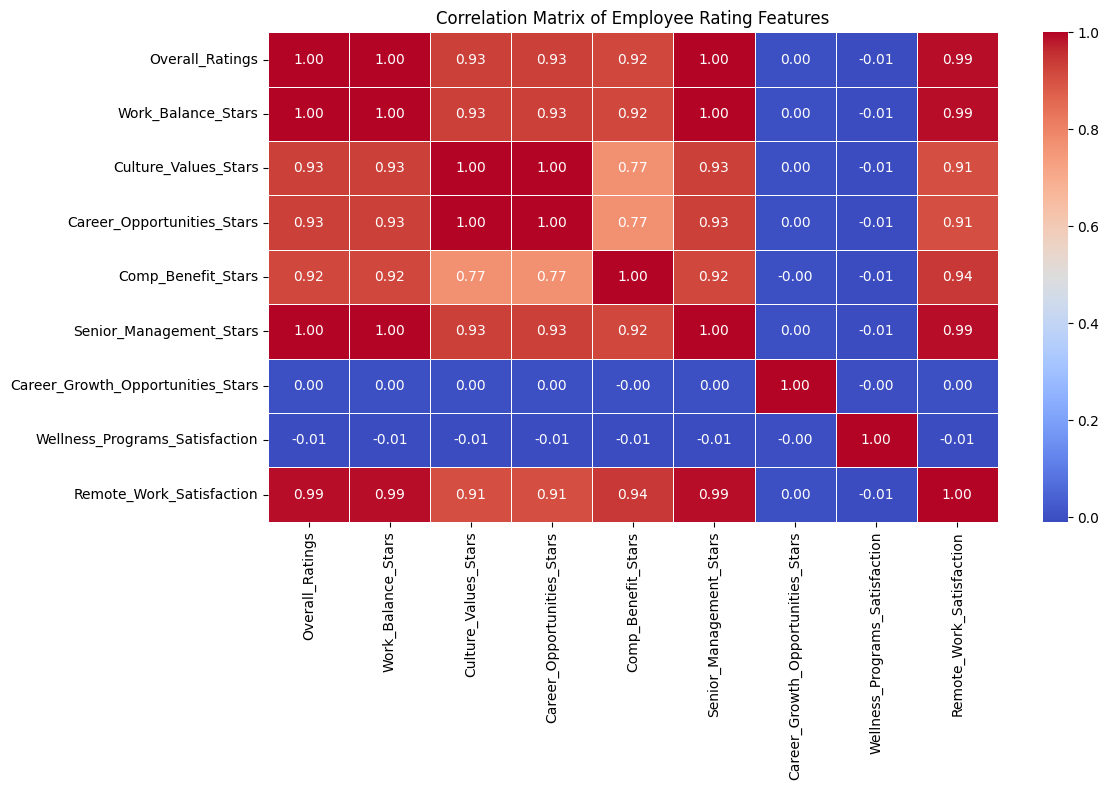

In [45]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Employee Rating Features')
plt.tight_layout()
plt.show()


### Correlation Among Rating Features

We analyzed how the various employee rating metrics relate to one another using a correlation heatmap.

#### Key Takeaways:

- **Strong Positive Correlations**:
  - `Overall_Ratings`, `Work_Balance_Stars`, and `Senior_Management_Stars` are perfectly correlated (correlation = 1.0), suggesting these scores may have been rated together or derived similarly.
  - `Remote_Work_Satisfaction` also shows a strong relationship with most major ratings, especially `Overall_Ratings` (0.99) and `Work_Balance_Stars` (0.99).

- **Culture and Career Opportunities**:
  - `Culture_Values_Stars` and `Career_Opportunities_Stars` are perfectly correlated (1.0), showing employees who value culture also perceive good growth opportunities.

- **Low or No Correlation**:
  - `Career_Growth_Opportunities_Stars`, `Wellness_Programs_Satisfaction`, and `Remote_Work_Satisfaction` show near-zero or negative correlation with others, suggesting these are perceived independently by employees.

#### Conclusion: Context and Purpose
So far, we've analyzed how the various rating columns relate to each other using correlation — but we intentionally left out Employee_Tenure, which represents how long an employee has worked in the company ( in years).

Now, we want to investigate:
- Does how long someone stays affect how they rate the company across different dimensions (like management, benefits, culture, etc.)?


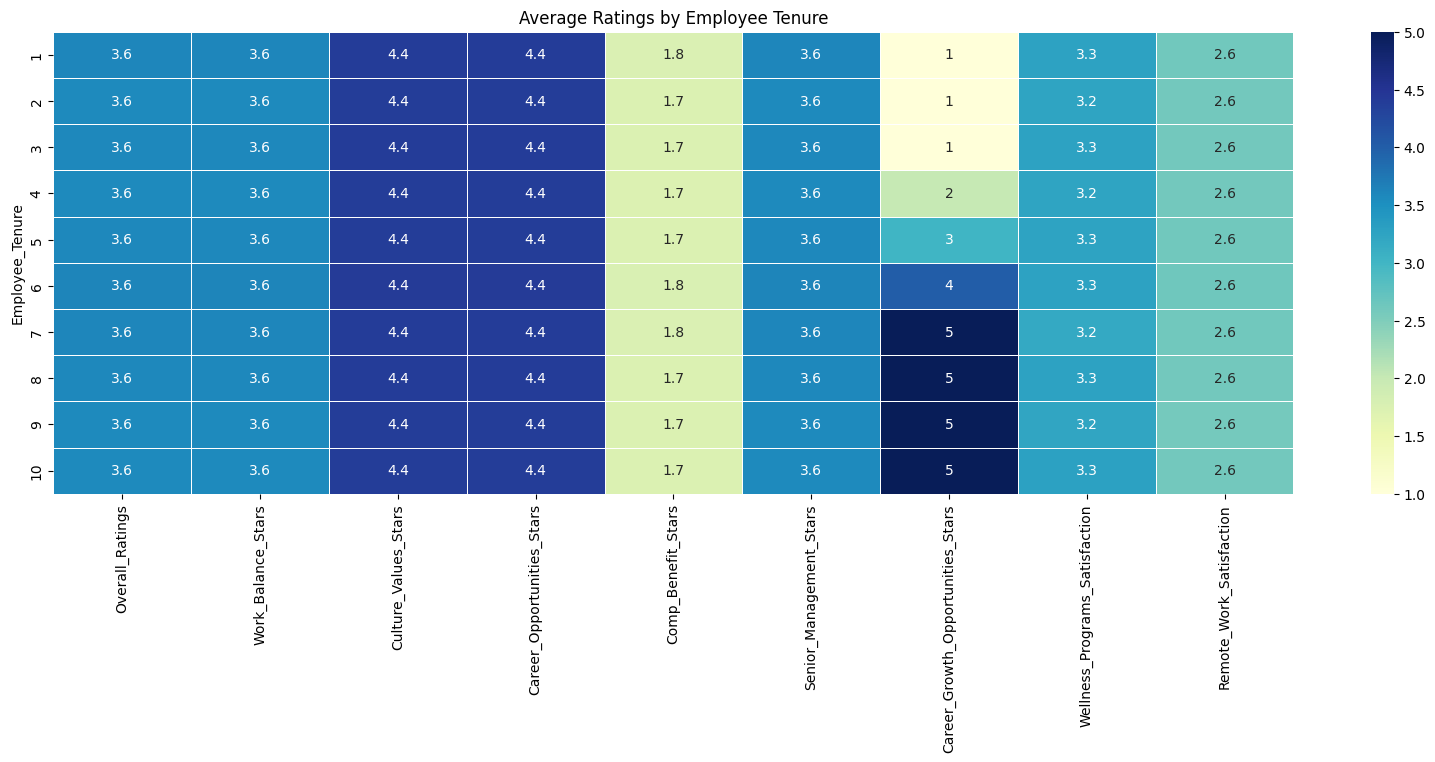

In [51]:
# Group the dataset by Employee_Tenure and get the ratings
tenure_grouped = dt.groupby('Employee_Tenure')[rating_columns].mean()

# Create figure
plt.figure(figsize=(20, 6))

# Create plot
ax = sns.heatmap(tenure_grouped, cmap='YlGnBu', annot=True, linewidths=0.5)
plt.title('Average Ratings by Employee Tenure')

plt.show()

In [47]:
tenure_grouped

,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
Employee_Tenure,,,,,,,,,
1,3.601412,3.601412,4.392811,4.392811,1.758344,3.601412,1.0,3.267009,2.622914
2,3.574347,3.574347,4.383456,4.383456,1.738111,3.574347,1.0,3.243804,2.595445
3,3.590249,3.590249,4.396836,4.396836,1.745883,3.590249,1.0,3.270262,2.609299
4,3.574747,3.574747,4.384175,4.384175,1.731987,3.574747,2.0,3.236027,2.595623
5,3.587276,3.587276,4.387602,4.387602,1.749429,3.587276,3.0,3.261990,2.609788
6,3.617099,3.617099,4.409514,4.409514,1.765802,3.617099,4.0,3.271457,2.636727
7,3.602307,3.602307,4.399729,4.399729,1.759756,3.602307,5.0,3.186970,2.624024
8,3.587748,3.587748,4.397682,4.397682,1.738079,3.587748,5.0,3.266887,2.604636
9,3.570818,3.570818,4.375945,4.375945,1.736116,3.570818,5.0,3.222149,2.590536


### 📊 Average Ratings by Employee Tenure (Insights)

- **Stable Overall Ratings:**  
  Regardless of how long employees stay (1–10 years), overall satisfaction holds steady around **3.6/5** — suggesting consistent perception over time.

- **Strong Culture & Opportunity Ratings:**  
  Culture and career opportunity scores are high (~**4.39**) across all tenure levels, showing employees consistently value these aspects.

- **Low Compensation Ratings:**  
  Compensation remains low (~**1.74–1.76**) no matter how long employees stay, indicating this may be a persistent concern affecting sentiment.

- **Career Growth Improves with Tenure:**  
  Ratings for career growth opportunities increase sharply with tenure — from **1.0** for new hires to **5.0** by year 7, showing that growth is earned over time.

- **Remote & Wellness Satisfaction Flat:**  
  Satisfaction with remote work and wellness programs stays relatively flat, with remote work around **2.6** and wellness around **3.2–3.3**, suggesting these policies might need a refresh or better communication.

---

### ❓ Key Questions & Answers

**1. Are new employees more optimistic or critical?**  
New employees (Year 1–2) tend to be slightly optimistic in areas like **Culture** and **Career Opportunities**, both rated around **4.39** — similar to longer-tenured staff.  
However, they’re critical of **Career Growth**, giving it a low rating of **1.0**, and consistently rate **Compensation** poorly (~**1.74**), indicating immediate awareness of limited benefits.  
So, while not overly negative, their optimism is tempered by clear concerns.

---

**2. Is there a drop-off in ratings after a certain number of years?**  
No significant drop-off is observed. **Overall Ratings**, **Culture**, and **Career Opportunities** remain consistently stable from Year 1 to Year 10, hovering around **3.57–3.61** and **4.38–4.41** respectively.  
There is a mild dip in **Wellness Program** satisfaction around Year 7–9, but it slightly picks up again by Year 10.

---

**3. Do longer-term employees rate leadership or compensation differently?**  
Surprisingly, **Compensation ratings** stay low and flat regardless of tenure (~**1.73–1.76**), meaning longer-term staff are not more satisfied in this area.  
**Leadership ratings** (Senior Management) also remain steady across all tenure levels (~**3.57–3.61**), with no clear upward or downward trend.  

The biggest positive shift is seen in **Career Growth Opportunities**, which rises from **1.0** (Year 1–3) to **5.0** (by Year 7), indicating that growth becomes more tangible with time.


### b. Bivariate Analysis: Categorical vs Categorical

Here, we explore how two categorical features — `Employee_Engagement_Activities` and `Location` — relate to each other. The goal is to understand how employee engagement varies across locations.


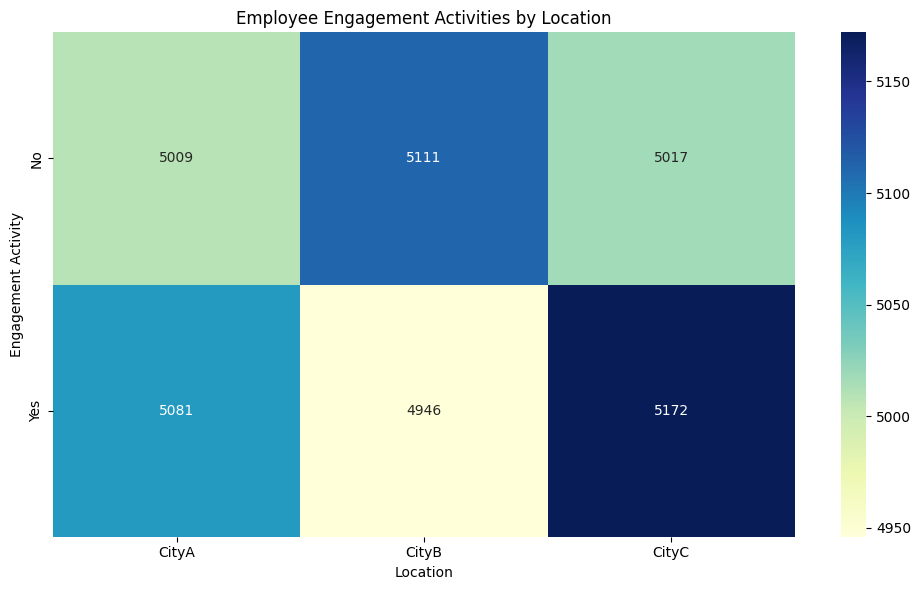

In [52]:
# Create cross-tab
cross_tab = pd.crosstab(dt['Employee_Engagement_Activities'], dt['Location'])

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Employee Engagement Activities by Location')
plt.xlabel('Location')
plt.ylabel('Engagement Activity')
plt.tight_layout()
plt.show()


We explored the relationship between `Employee Engagement Activities` and `Location` using a heatmap of their cross-tabulation.

#### Observations:
- Each location (`CityA`, `CityB`, `CityC`) shows a relatively balanced distribution of employees who participate (`Yes`) and don’t participate (`No`) in engagement activities.
- No strong location-based bias is observed — participation levels are consistent across cities.
- This suggests that employee engagement initiatives are uniformly implemented across all company branches.


### c. Bivariate Analysis: Numerical vs Categorical Variables

In this section, we explore how numerical ratings vary across categorical groups.

We’ll compare the two categorical variables — `Employee_Engagement_Activities` and `Location` — against the various employee rating features to identify any noticeable patterns or differences across groups.


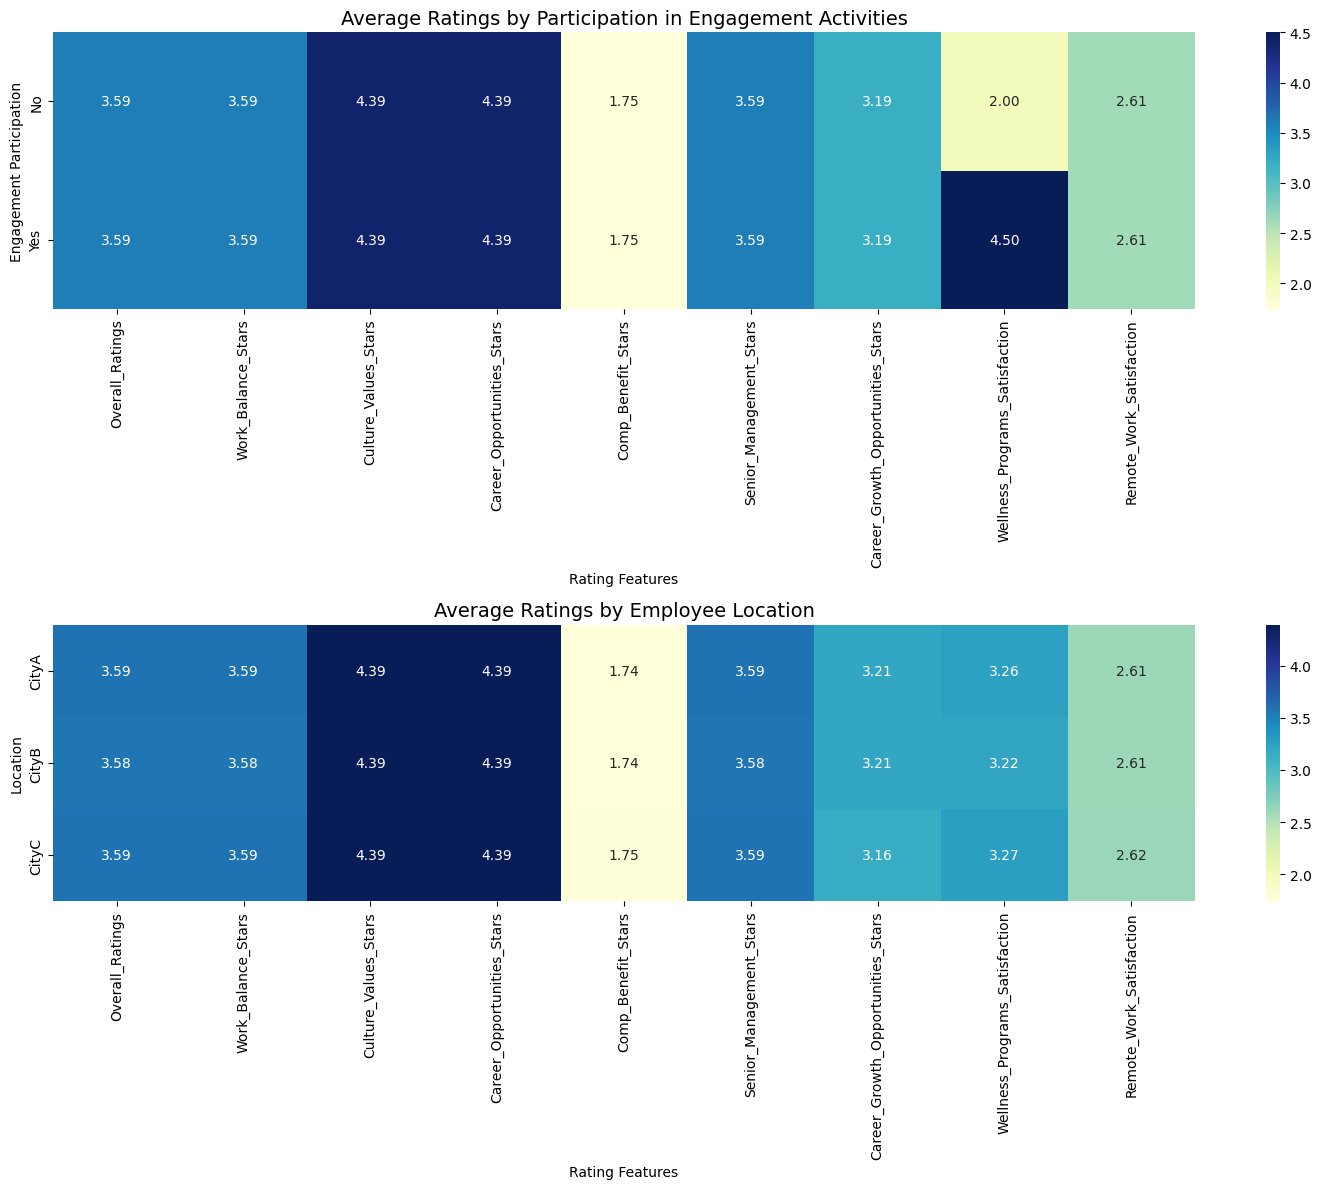

In [50]:
# Grouping the ratings by Employee Engagement Activities
engagement_grouped = dt.groupby('Employee_Engagement_Activities')[rating_columns].mean()

# Grouping the ratings by Employee Location
location_grouped = dt.groupby('Location')[rating_columns].mean()

# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Heatmap: Ratings by Engagement Activities
sns.heatmap(engagement_grouped, cmap='YlGnBu', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Average Ratings by Participation in Engagement Activities', fontsize=14)
axes[0].set_xlabel('Rating Features')
axes[0].set_ylabel('Engagement Participation')

# Heatmap: Ratings by Location
sns.heatmap(location_grouped, cmap='YlGnBu', annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Average Ratings by Employee Location', fontsize=14)
axes[1].set_xlabel('Rating Features')
axes[1].set_ylabel('Location')

plt.tight_layout()
plt.show()


- **Employee Engagement vs Ratings**:  
  For most rating features, participation in engagement activities doesn't significantly affect the average scores values remain similar whether employees participate or not.  
  However, a notable exception is in **Wellness Program Satisfaction**:  
  - Employees who do **not** participate rate it around **2.0**  
  - Those who **do** participate rate it around **4.5**  
  This suggests a strong link — employees who feel supported by wellness programs are more likely to engage in broader company activities.

- **Location vs Ratings**:  
  There is **no significant difference** in average ratings across different locations (CityA, CityB, CityC).  
  This consistency implies that employee experience — in terms of culture, management, and support — is uniform across branches.



Next, we'll analyze how **Employee Tenure** relates to these categorical groupings.

### Employee Tenure by Engagement & Location

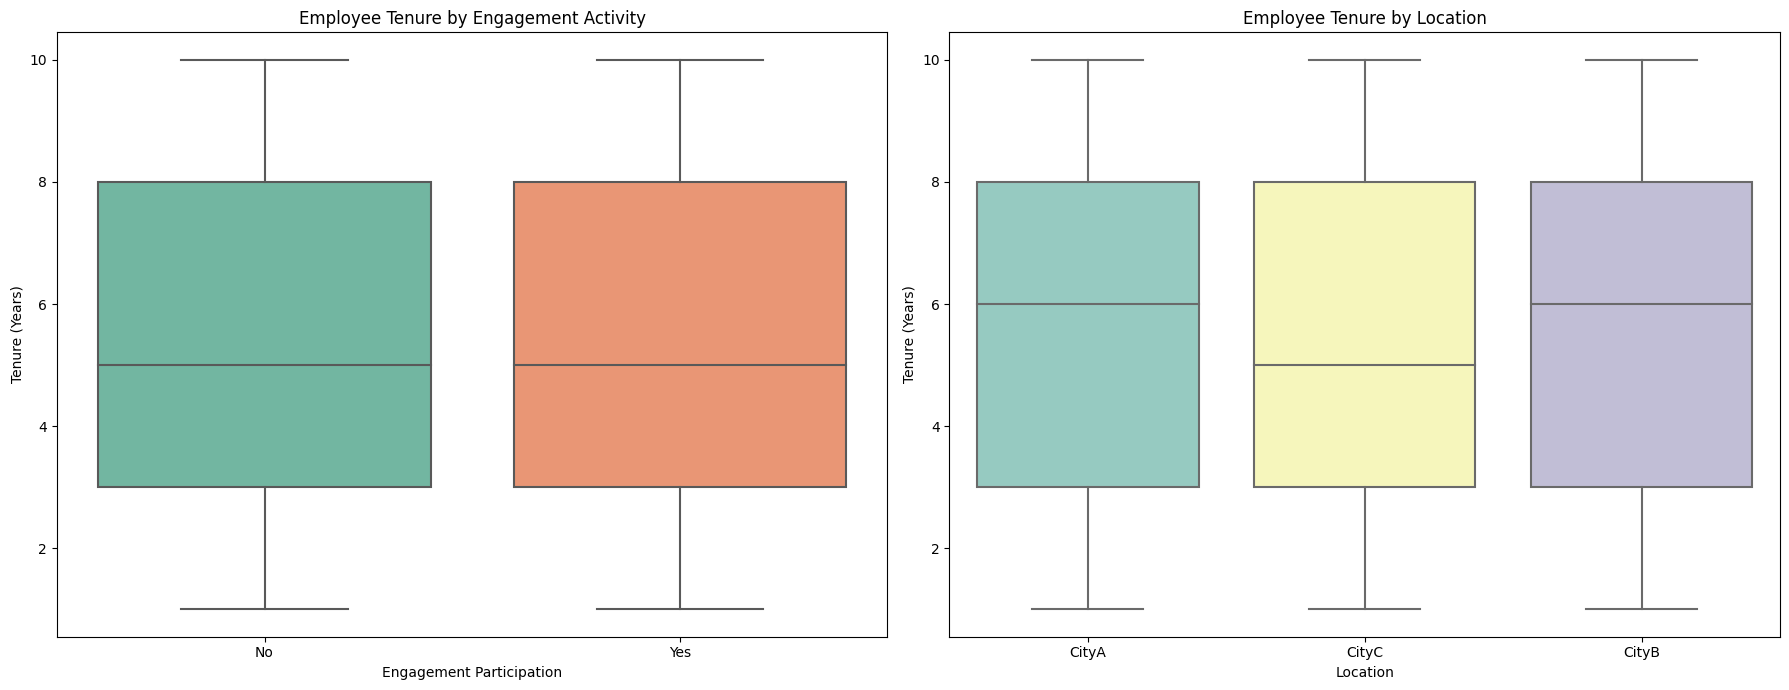

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(data=dt, x='Employee_Engagement_Activities', y='Employee_Tenure', ax=ax[0], palette='Set2')
ax[0].set_title('Employee Tenure by Engagement Activity')
ax[0].set_xlabel('Engagement Participation')
ax[0].set_ylabel('Tenure (Years)')

sns.boxplot(data=dt, x='Location', y='Employee_Tenure', ax=ax[1], palette='Set3')
ax[1].set_title('Employee Tenure by Location')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Tenure (Years)')

plt.tight_layout()
plt.show()



We used boxplots to explore how employee tenure varies across:

- **Engagement Activity Participation**
- **Location**

#### Observations:

- **Engagement Activities**: 
  - The distribution of tenure is nearly identical between employees who participate and those who don’t.
  - This suggests that participation in engagement activities does **not strongly correlate** with how long employees stay.

- **Location**: 
  - Similarly, tenure distribution is consistent across all three locations (CityA, CityB, CityC).
  - This indicates that **location does not influence** how long employees stay at the company.

Overall, **Employee Tenure appears independent of both engagement and location**.


## Word Frequency Analysis

In this section, we will analyze the textual columns in the dataset to identify the most frequently used words.

The text-based columns include:
- `Comment_Positives`
- `Comment_Negatives`
- `Advice_To_Mgmt`

Since the comments are separated into different columns, this analysis will help us:
- Understand the most common words used in positive feedback,
- Identify recurring themes or concerns in negative feedback,
- Explore the most suggested points in employee advice to management.

This will provide a clearer view of the overall employee sentiment and highlight recurring patterns across different types of feedback.


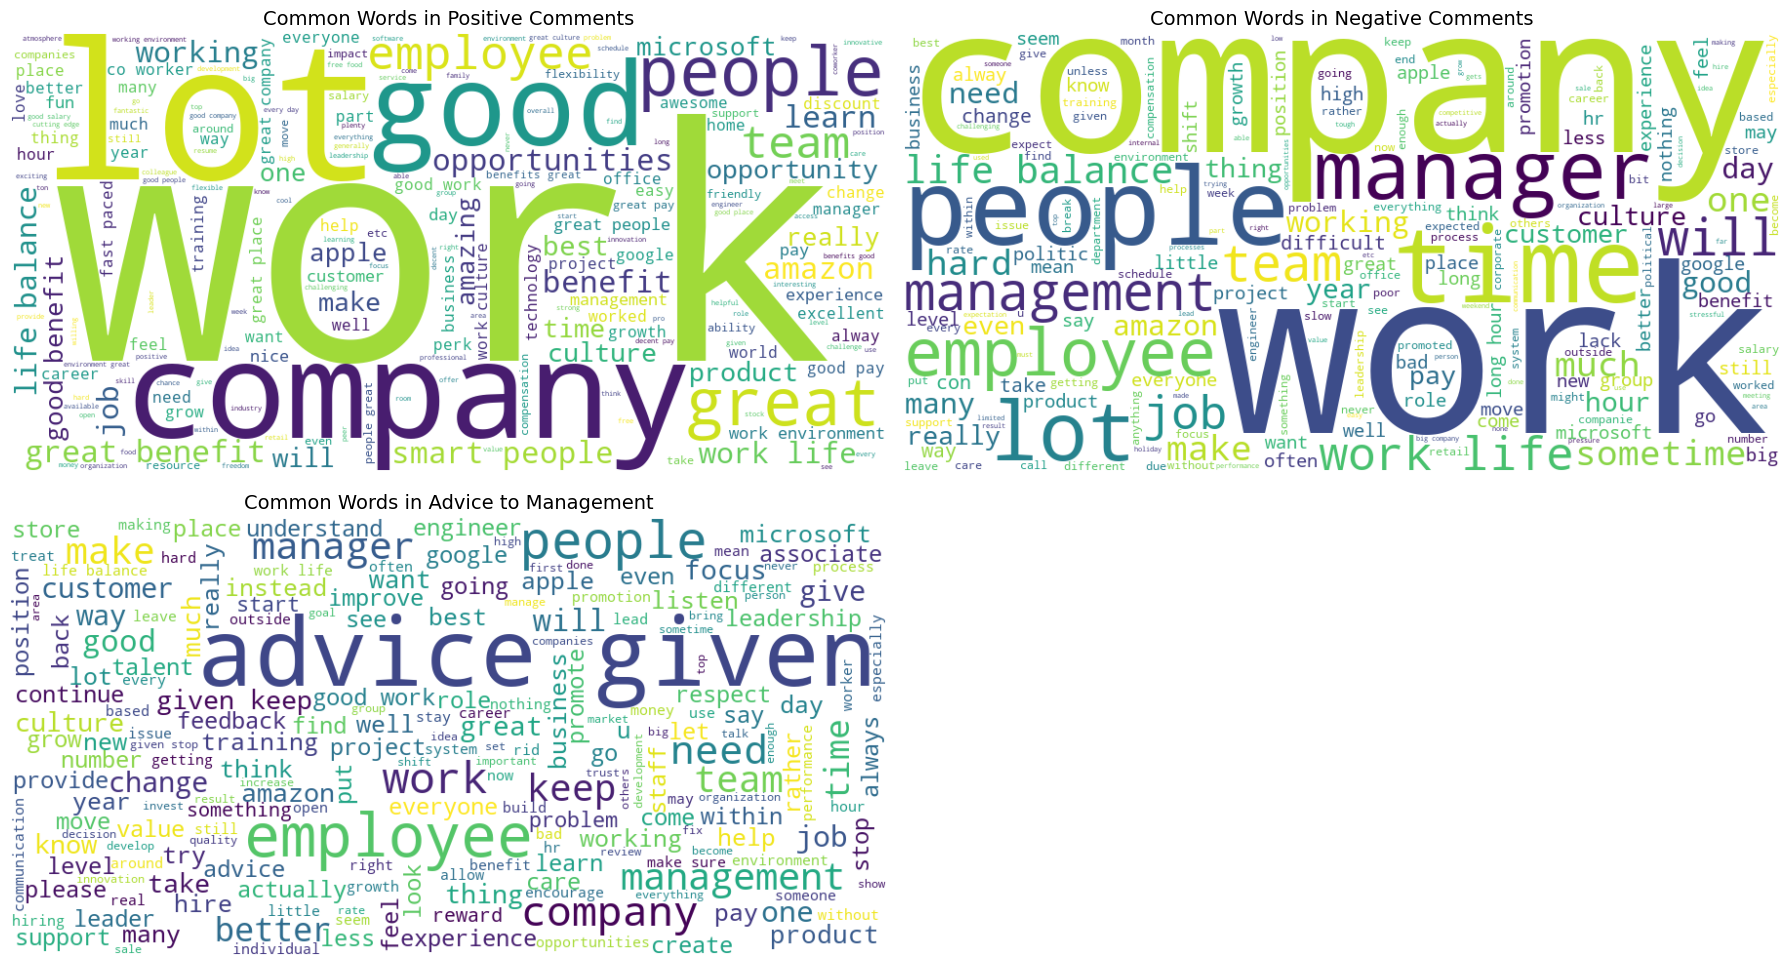

In [57]:
# Step 1: Combine text from each comment column into a single string
positive_comments = ' '.join(dt['Comment_Positives'].dropna()).lower()
negative_comments = ' '.join(dt['Comment_Negatives'].dropna()).lower()
advice_comments = ' '.join(dt['Advice_To_Mgmt'].dropna()).lower()

# Step 2: Define a function to generate word clouds
def plot_wordcloud(text, title, ax):
    wordcloud = WordCloud(background_color="white", width=900, height=450).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=14)
    ax.axis("off")

# Step 3: Create subplot layout
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

# Step 4: Plot word clouds for each category
plot_wordcloud(positive_comments, "Common Words in Positive Comments", ax[0, 0])
plot_wordcloud(negative_comments, "Common Words in Negative Comments", ax[0, 1])
plot_wordcloud(advice_comments, "Common Words in Advice to Management", ax[1, 0])

# Step 5: Remove the empty subplot (bottom-right)
ax[1, 1].remove()

# Step 6: Show plot
plt.tight_layout()
plt.show()


### Themes from Employee Comments

This visualization highlights the most commonly used words across three employee feedback categories:

- **Positive Comments:** Words like *"work," "company," "good,"* and *"great"* are most frequent, suggesting employees appreciate the work environment and culture.
- **Negative Comments:** Terms such as *"manager," "time," "work,"* and *"company"* dominate, pointing to issues with management, workload, and scheduling.
- **Advice to Management:** Words like *"give," "advice," "people," "manager,"* and *"keep"* appear often, indicating a desire for better communication, recognition, and leadership.

These word clouds help us quickly identify recurring themes in employee sentiment.


### Temporal Analysis

 we will be looking at the ratings with time to see if there are changes in the ratings over time, or  patterns  over time.

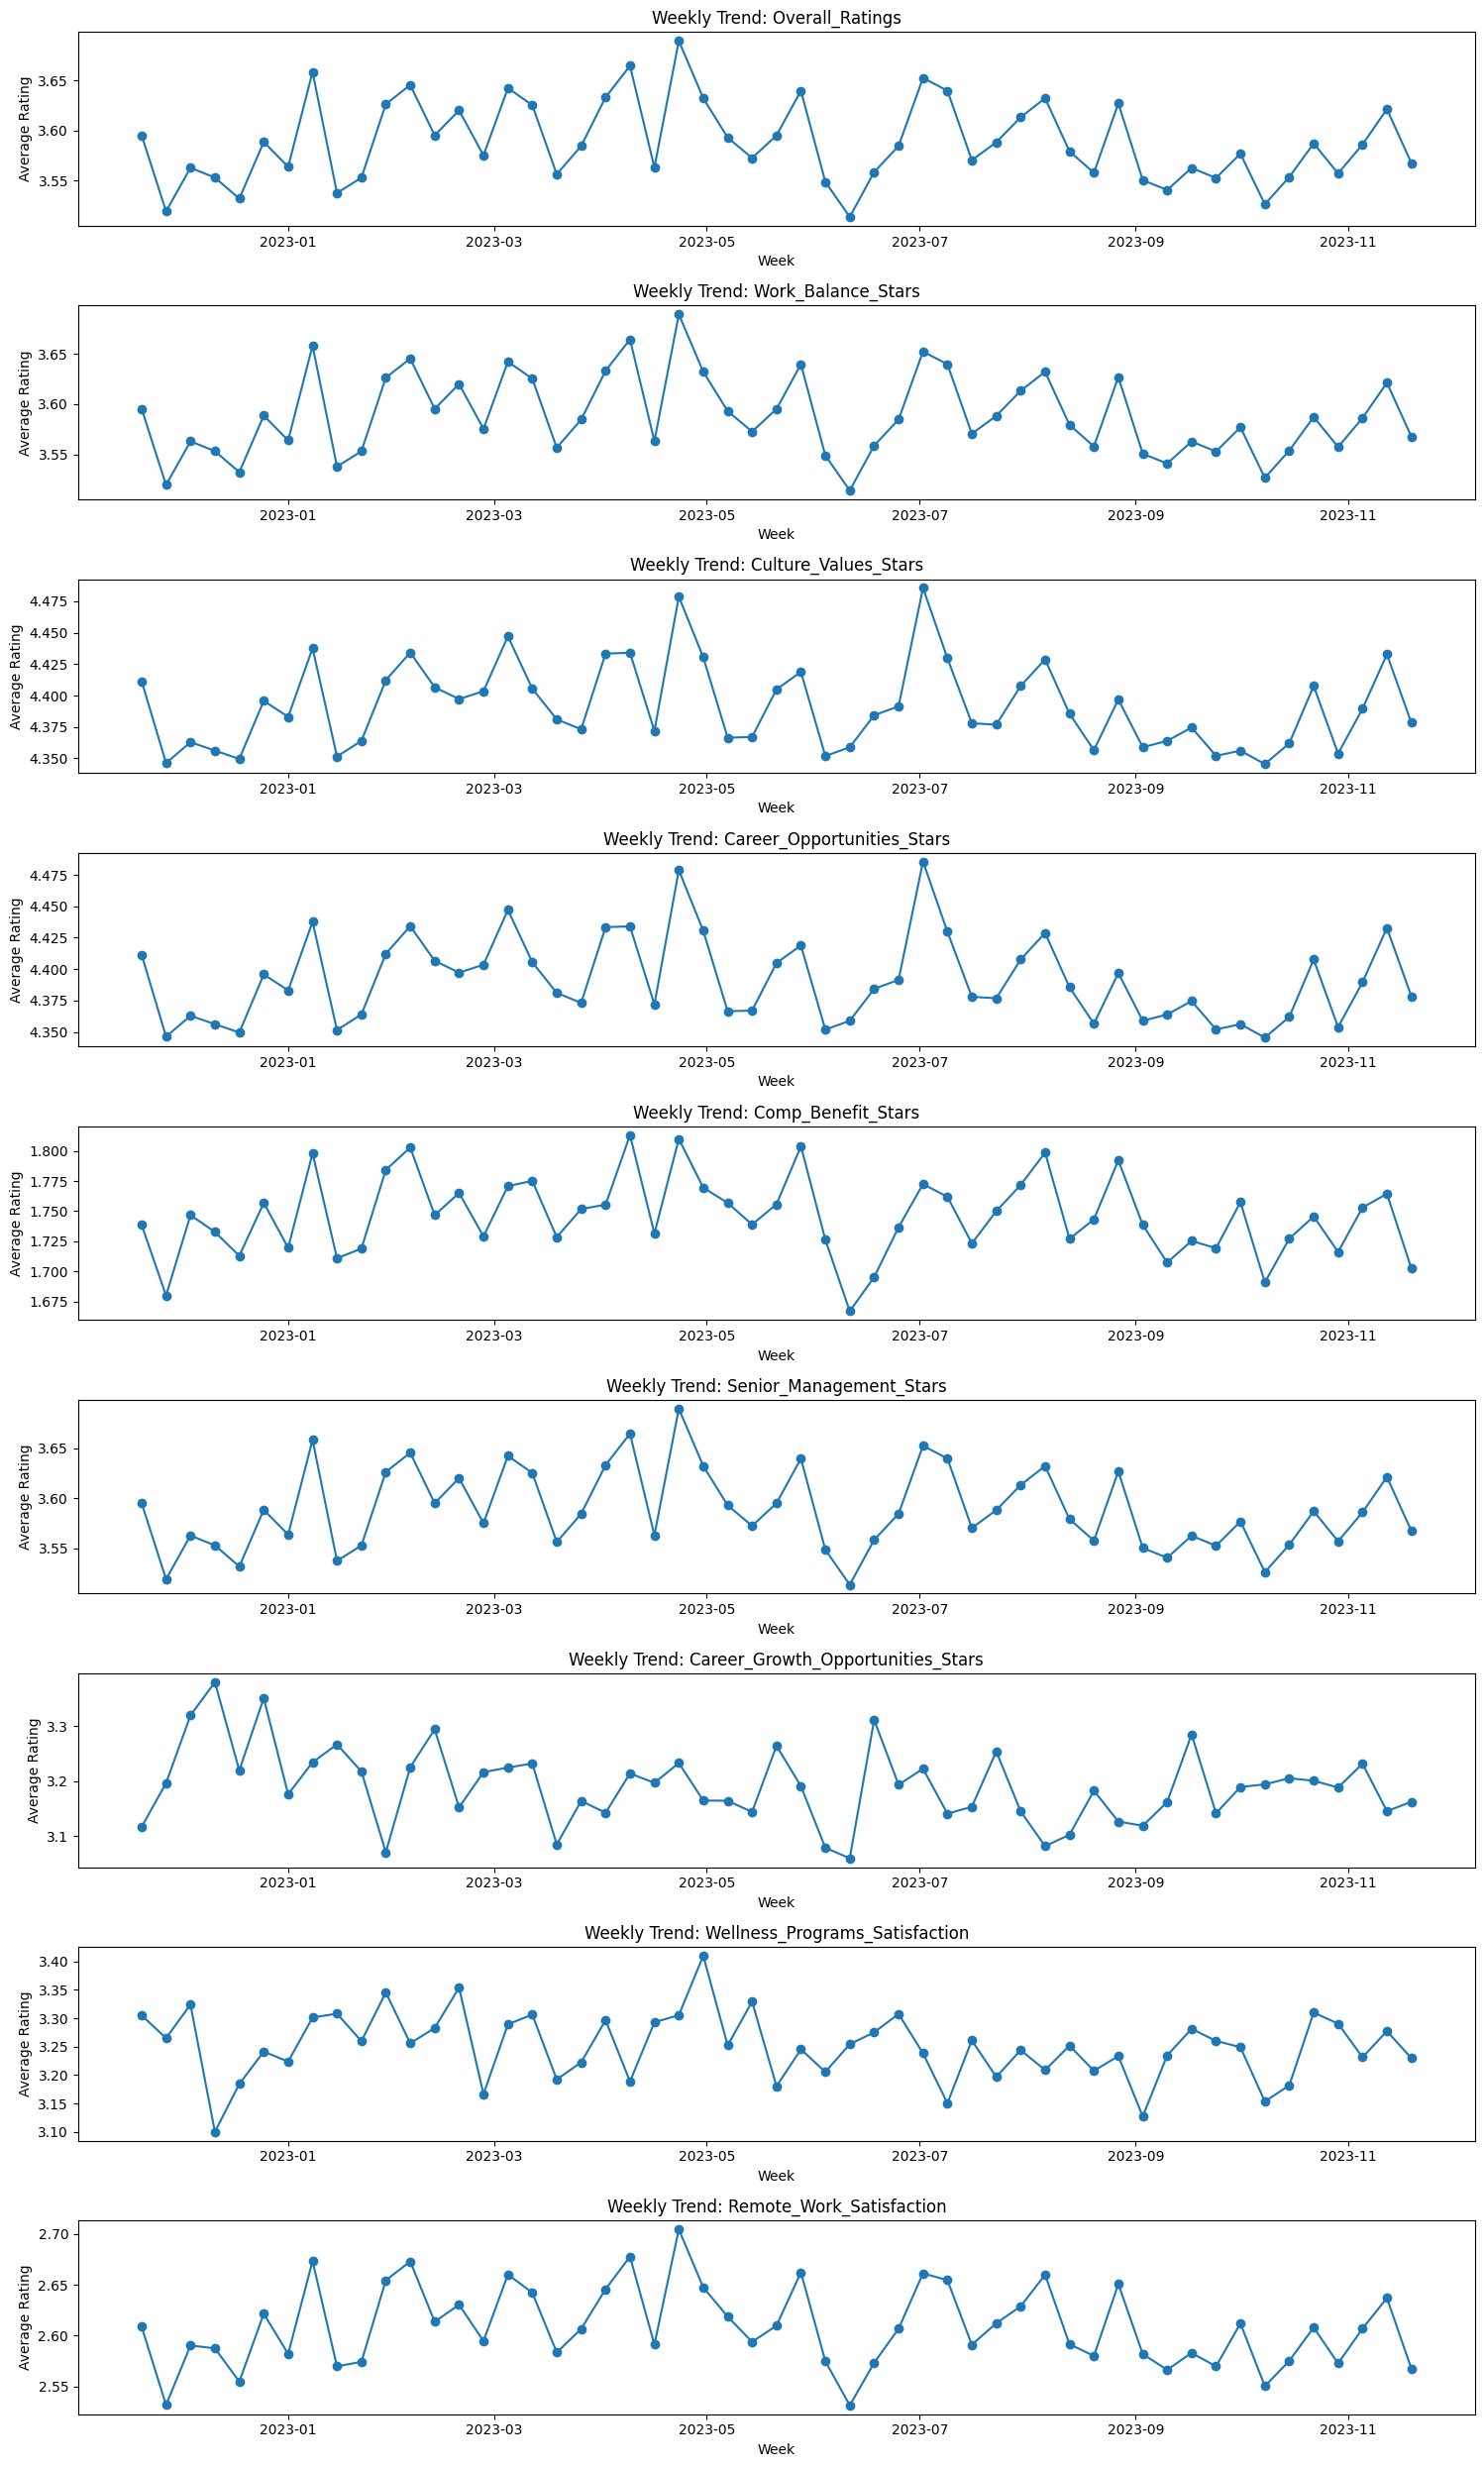

In [58]:
# Create a copy of the original DataFrame
dt2 = dt.copy()

# Convert 'Feedback_Date' to datetime format
dt2['Feedback_Date'] = pd.to_datetime(dt2['Feedback_Date'])

# Set 'Feedback_Date' as the index and compute weekly averages
dt2.set_index('Feedback_Date', inplace=True)
weekly_avg = dt2.resample('W').mean(numeric_only=True)

# Plot the weekly trend of each rating column
fig, axes = plt.subplots(len(rating_columns), 1, figsize=(15, 25))

for i, col in enumerate(rating_columns):
    axes[i].plot(weekly_avg.index, weekly_avg[col], marker='o')
    axes[i].set_title(f'Weekly Trend: {col}')
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()



We analyzed how various employee satisfaction ratings changed over time by grouping feedback weekly.

#### Key Observations:
- **Overall Ratings & Work-Life Balance** remained relatively stable across the year, showing no major fluctuations.
- **Culture & Career Opportunities** ratings are consistently high and steady.
- **Compensation Ratings** remained low throughout, with slight weekly variations but no upward trend.
- **Career Growth & Senior Management** ratings show more week-to-week fluctuation, but with no major upward or downward pattern.
- **Wellness & Remote Work Satisfaction** had mild fluctuations, but mostly stayed flat over time.

This trend analysis helps track consistency or identify shifts in employee sentiment across time.


## Summary Insights

- **Overall Satisfaction is Moderate**  
  Employees rate the company **3.59/5**, indicating general satisfaction but also signaling room for improvement.

- **Strong Areas Identified**  
  - **Company Culture** and **Career Opportunities** are highly rated (**4.39/5**), suggesting a positive work environment and perceived growth potential.  
  - **Employee Tenure** averages over **5 years**, pointing to solid retention and organizational loyalty.

- **Consistent Pain Points**  
  - **Compensation & Benefits** receive very low ratings (**1.75/5**), regardless of how long employees have stayed.  
  - **Remote Work Satisfaction** is also low (**2.61/5**), hinting at possible issues with flexibility or hybrid policies.  
  - **Career Growth Opportunities** show a polarized trend  many employees rate it either very low or very high.

- **Work-Life Balance & Leadership Are Mixed**  
  Ratings for **Work-Life Balance** and **Senior Management** sit at a neutral **3.59/5**, suggesting average experiences without major highs or lows.

- **No Location Bias Detected**  
  Ratings and participation in engagement activities are consistent across **CityA**, **CityB**, and **CityC**, meaning employee experience is uniform across branches.

- **Engagement Programs Show One Strong Effect**  
  Participation in engagement activities does not significantly affect most rating metrics  **except** for **Wellness Satisfaction**, which is much higher among engaged employees.

- **Career Growth Tied to Tenure**  
  Career growth ratings rise from **1.0 (new hires)** to **5.0 (after 7 years)**, showing advancement is possible but takes time.

- **Compensation Satisfaction Doesn’t Improve Over Time**  
  Compensation scores remain flat across all tenure levels  a red flag that pay policies may not reward loyalty.

- **Text Analysis Matches Numeric Trends**  
  - Positive feedback emphasizes *"work"*, *"good"*, *"company"*.  
  - Negative comments focus on *"management"*, *"time"*, *"pay"*.  
  - Advice to management includes *"give"*, *"support"*, and *"better leadership"*, pointing to gaps in recognition and trust.

- **Temporal Trends Stay Flat**  
  Ratings for most features (e.g., culture, work-life, compensation) remain relatively stable week to week — no major improvements or declines observed.

---

## Recommendations

1. **Review and Adjust Compensation Structure**  
   Address consistently low pay ratings by conducting salary benchmarking, improving transparency, or introducing bonus structures.

2. **Improve Remote Work Experience**  
   Collect feedback on remote challenges and improve tools, flexibility, or hybrid options to raise satisfaction levels.

3. **Accelerate Career Growth Access**  
   Instead of growth being tenure-based, consider mentorship, visible career paths, and internal upskilling to unlock growth earlier.

4. **Enhance Leadership Visibility and Trust**  
   Employees seek better leadership. Introduce Q&A sessions, performance feedback loops, or skip-level check-ins to build connection.

5. **Leverage Wellness Programs**  
   Wellness support significantly improves engagement. Expand offerings and communicate the benefits more broadly to boost participation.


